In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [3]:
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df = df.sort_values(by='time')

In [6]:
df['ones'] = 1

In [7]:
df['event_idx'] = np.arange(0, df.shape[0], 1)

In [8]:
df.set_index('time', inplace=True)

Text(0, 0.5, 'cumulative number of events')

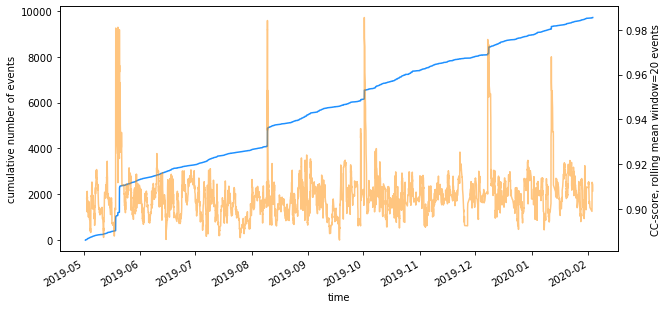

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')
# ax.set_yscale('log')

<AxesSubplot:xlabel='time'>

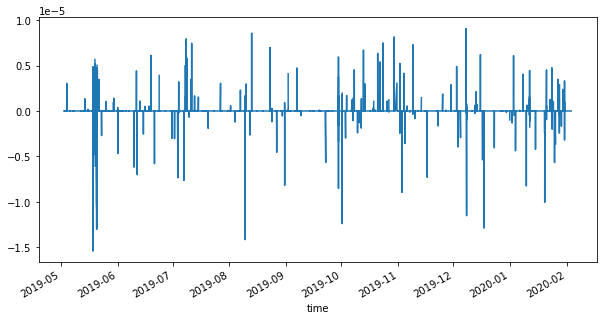

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
dndt = (df.similarity.rolling(window=20).mean().diff()[:-1]/((df.similarity.rolling(window=20).mean().index[1:]-df.similarity.rolling(window=20).mean()[:-1].index).total_seconds())/86400)
dndt.plot(fig=fig)


In [11]:
# (df.similarity.rolling(window=20).mean().index[1:]-df.similarity.rolling(window=20).mean()[:-1].index).total_seconds()

In [12]:
# df.similarity.plot()

In [13]:
# days_count = df.groupby(pd.Grouper(freq='1D')).sum()
# days_count[days_count.ones > 2]

In [23]:
df.template_id.unique()

array([1, 0])

<AxesSubplot:xlabel='template_id'>

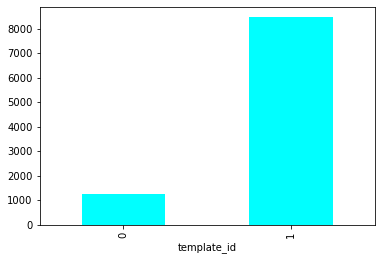

In [14]:
df.groupby('template_id').count().ones.plot.bar(color='cyan')

In [15]:
df

,similarity,template_id,ones,event_idx
time,,,,
2019-05-02 00:01:19.041000+00:00,0.889259,1,1,0
2019-05-02 00:02:52.915000+00:00,0.932812,1,1,1
2019-05-02 00:02:52.915000+00:00,0.932812,1,1,2
2019-05-02 00:23:51.952000+00:00,0.878688,1,1,3
2019-05-02 00:37:01.531000+00:00,0.938928,1,1,4
...,...,...,...,...
2020-02-03 08:30:58.215000+00:00,0.875324,1,1,9714
2020-02-03 09:18:30.853000+00:00,0.880235,1,1,9715
2020-02-03 10:18:15.810000+00:00,0.891027,1,1,9716


In [16]:
df[df.template_id==0]

,similarity,template_id,ones,event_idx
time,,,,
2019-05-02 02:09:48.566000+00:00,0.883071,0,1,10
2019-05-02 16:56:20.915000+00:00,0.881512,0,1,20
2019-05-02 17:45:13.642000+00:00,0.875793,0,1,23
2019-05-03 03:17:45.019999+00:00,0.882144,0,1,55
2019-05-03 03:21:48.564999+00:00,0.912398,0,1,57
...,...,...,...,...
2020-01-30 20:59:32.057000+00:00,0.887095,0,1,9674
2020-01-30 20:59:32.063000+00:00,0.935378,0,1,9675
2020-02-01 03:06:36.004000+00:00,0.878962,0,1,9685


In [17]:
df[df.event_idx==37]

,similarity,template_id,ones,event_idx
time,,,,
2019-05-02 21:59:48.729000+00:00,0.930454,1,1,37


In [18]:
df.index

DatetimeIndex(['2019-05-02 00:01:19.041000+00:00',
               '2019-05-02 00:02:52.915000+00:00',
               '2019-05-02 00:02:52.915000+00:00',
               '2019-05-02 00:23:51.952000+00:00',
               '2019-05-02 00:37:01.531000+00:00',
               '2019-05-02 01:06:28.730000+00:00',
               '2019-05-02 01:14:56.355000+00:00',
               '2019-05-02 01:29:21.155000+00:00',
               '2019-05-02 01:31:46.832000+00:00',
               '2019-05-02 01:51:14.032000+00:00',
               ...
               '2020-02-03 02:43:29.748000+00:00',
               '2020-02-03 02:53:33.289000+00:00',
               '2020-02-03 03:03:16.454000+00:00',
               '2020-02-03 03:17:15.255000+00:00',
               '2020-02-03 03:36:26.949000+00:00',
               '2020-02-03 08:30:58.215000+00:00',
               '2020-02-03 09:18:30.853000+00:00',
               '2020-02-03 10:18:15.810000+00:00',
               '2020-02-03 10:40:50.724000+00:00',
            

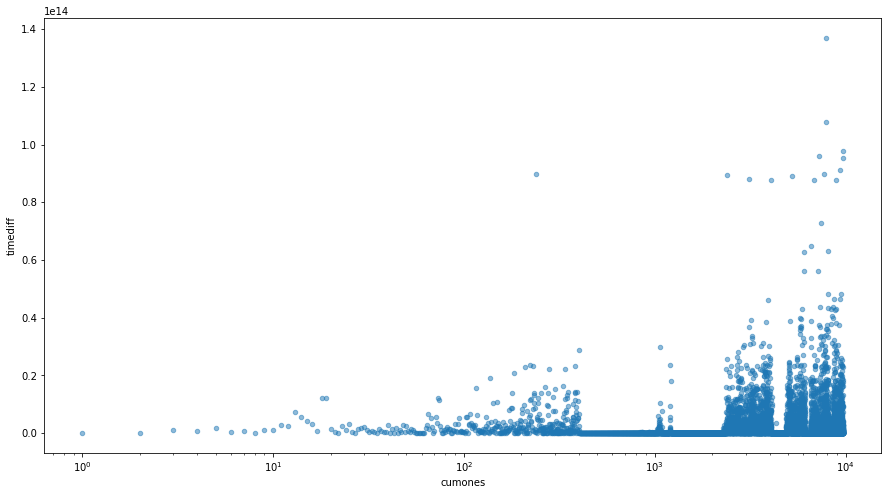

In [19]:
test = pd.DataFrame()

test['timediff'] = (df.index[1:] - df.index[:-1])
test['ones'] = 1
test['cumones'] = test.ones.cumsum()
test.set_index(df.index[1:], inplace=True)
test['delta_seconds'] = test.timediff.apply(lambda x: x.total_seconds())

fig, ax = plt.subplots(figsize=(15, 8))
test.plot.scatter(y='timediff', x='cumones', alpha=0.5, ax=ax)
ax.set_xscale('log')

Text(0, 0.5, 'Count events')

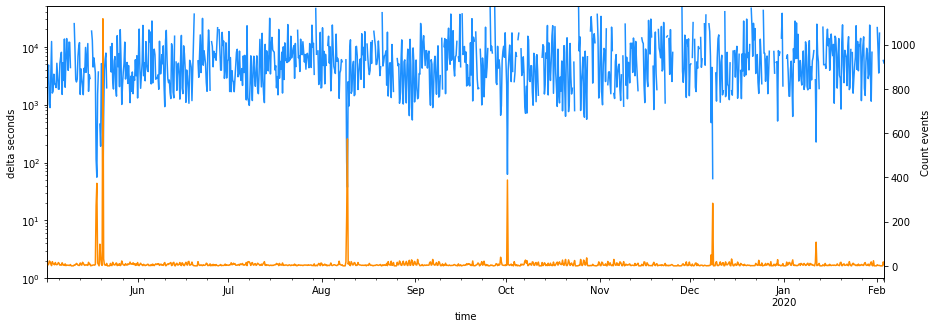

In [20]:
fig, ax = plt.subplots(figsize=(15, 5), sharex=True)

freq = '6h'

test.groupby(pd.Grouper(freq=freq)).mean().delta_seconds.plot(ax=ax, color='dodgerblue')
ax.set_yscale('log')
ax.set_ylabel('delta seconds')
ax.set_ylim(1e0, 5e4)

# fig, ax = plt.subplots(figsize=(15, 5), sharex=True)

ax2 = ax.twinx()

test.groupby(pd.Grouper(freq=freq)).sum().ones.plot(ax=ax2, color='darkorange')
ax2.set_ylabel('Count events')

# from scipy import signal
# corr = signal.correlate(test.delta_seconds, test.cumones)
# fig, ax = plt.subplots(figsize=(15, 5), sharex=True)

# ax.plot(corr)

TypeError: 'AxesSubplot' object is not subscriptable

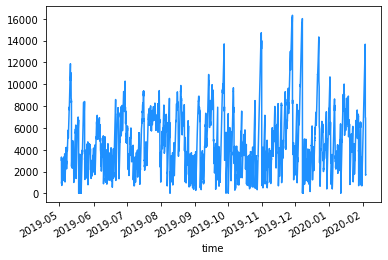

In [21]:
test.delta_seconds.rolling(window=20).mean().plot( color='dodgerblue')
ax[0].set_yscale('log')
ax[0].set_ylabel('delta seconds')

In [ ]:
test.groupby(pd.Grouper(freq='6h')).sum()

In [ ]:
# days_count = df.groupby(pd.Grouper(freq='1D')).sum()
# days_count[days_count.ones > 2]

In [ ]:
test[test.timediff==test.timediff.min()]

In [ ]:
df[df.event_idx==38]